# Gerekli kütüphanelerin importu

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Veri setinin yüklenmesi ve optimize edilmesi

In [4]:
# Veri setini yükle
file_path = './data.txt'
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
    'BMI', 'DiabetesPF', 'Age', 'IsDiabet'
]
data = pd.read_csv(file_path, delimiter='\t', names=column_names)

# Eksik değerleri doldurma (0 olan değerleri median ile değiştirme)

# Eksik değerlerin kontrolü
missing_values = data.isnull().sum()
print("Eksik değerler:\n", missing_values)

# Eksik değerleri medyan ile doldurma (örnek olarak)
data_filled = data.fillna(data.median())

# Veri setini standardize etme
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_filled.iloc[:, :-1]), columns=column_names[:-1])
data_scaled['IsDiabet'] = data['IsDiabet']

# Min-Max Ölçekleme
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=column_names)

print("\n\nEksik Değerleri Medyan'la Değiştirilmiş, Standardize Edilmiş ve Daha Sonra Min Max Ölçeklenmiş Veri Tablosu: \n")
df_scaled.head()

Eksik değerler:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DiabetesPF       0
Age              0
IsDiabet         0
dtype: int64


Eksik Değerleri Medyan'la Değiştirilmiş, Standardize Edilmiş ve Daha Sonra Min Max Ölçeklenmiş Veri Tablosu: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPF,Age,IsDiabet
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


# Naive Bayes

Veri setinin ayrılması modelin oluşturulması, eğitilmesi ve tahmin aşaması

In [7]:
# Veri setini eğitim ve test olarak ayır. Random state'imiz 9988
X_train, X_test, y_train, y_test = train_test_split(df_scaled.iloc[:, :-1], df_scaled['IsDiabet'], test_size=0.3, random_state=9988)

# Naive Bayes modeli oluşturma ve eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Tahmin
y_pred = nb_model.predict(X_test)

Sonuçların Yazdırılması

In [9]:
# Sonuçlar
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Naive Bayes Sonuçları:\n")
print(f"Doğruluk (Accuracy): {accuracy}")
print(f"Hassasiyet (Precision): {precision}")
print(f"Duyarlılık (Recall): {recall}")
print(f"F1 Skoru: {f1}")
print(f"Karışıklık Matrisi:\n{conf_matrix}\n")

Naive Bayes Sonuçları:

Doğruluk (Accuracy): 0.8051948051948052
Hassasiyet (Precision): 0.7
Duyarlılık (Recall): 0.6712328767123288
F1 Skoru: 0.6853146853146853
Karışıklık Matrisi:
[[137  21]
 [ 24  49]]



Matplotlib Kütüphanesi ile görselleştirilme aşaması

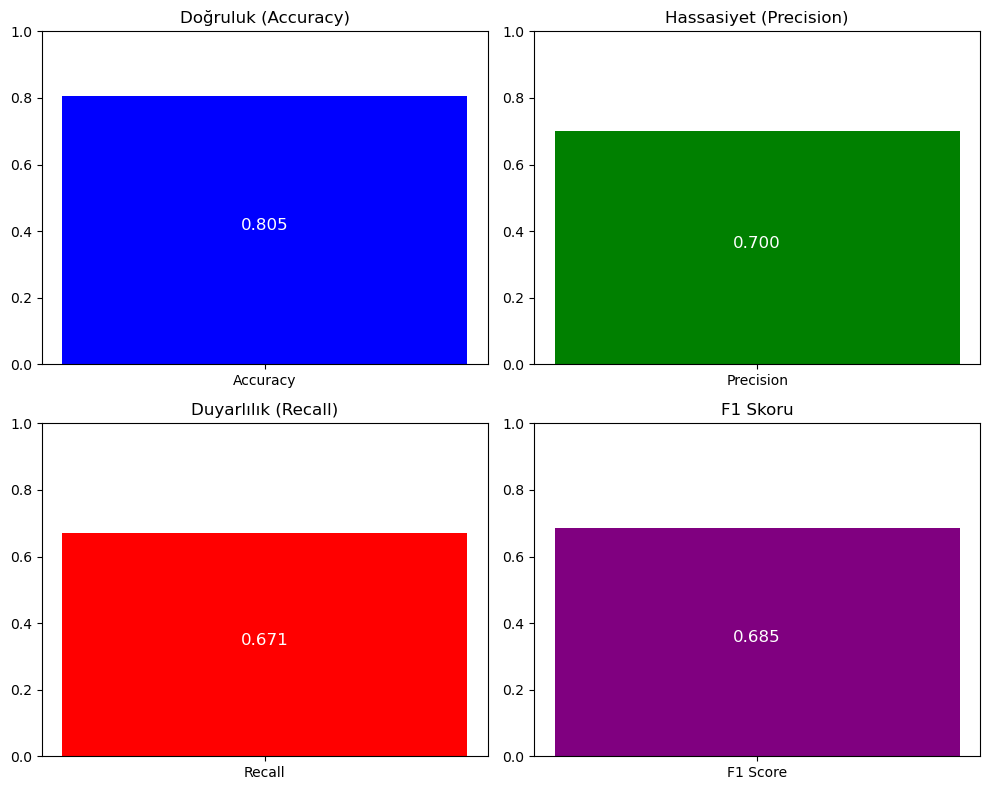

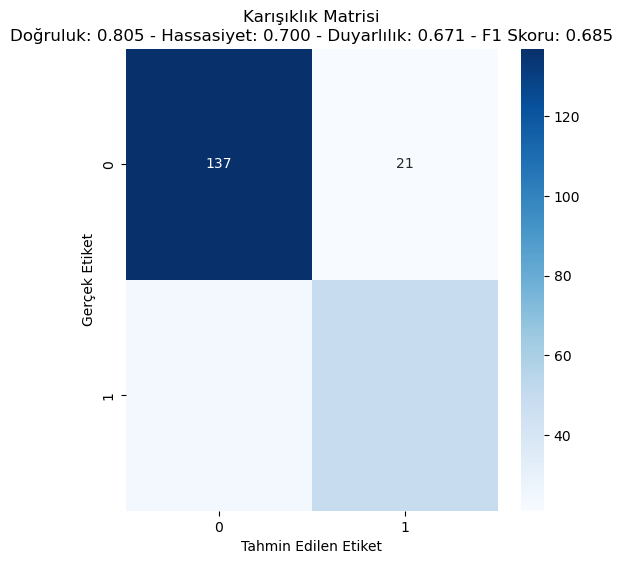

In [11]:
# Figür oluşturma
plt.figure(figsize=(10, 8))

# Doğruluk (Accuracy)
plt.subplot(2, 2, 1)
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.title('Doğruluk (Accuracy)')
for i in range(len([accuracy])):
    plt.text(i, [accuracy][i] / 2, f'{[accuracy][i]:.3f}', ha='center', color='white', fontsize=12)

# Hassasiyet (Precision)
plt.subplot(2, 2, 2)
plt.bar(['Precision'], [precision], color='green')
plt.ylim(0, 1)
plt.title('Hassasiyet (Precision)')
for i in range(len([precision])):
    plt.text(i, [precision][i] / 2, f'{[precision][i]:.3f}', ha='center', color='white', fontsize=12)

# Duyarlılık (Recall)
plt.subplot(2, 2, 3)
plt.bar(['Recall'], [recall], color='red')
plt.ylim(0, 1)
plt.title('Duyarlılık (Recall)')
for i in range(len([recall])):
    plt.text(i, [recall][i] / 2, f'{[recall][i]:.3f}', ha='center', color='white', fontsize=12)

# F1 Skoru (F1 Score)
plt.subplot(2, 2, 4)
plt.bar(['F1 Score'], [f1], color='purple')
plt.ylim(0, 1)
plt.title('F1 Skoru')
for i in range(len([f1])):
    plt.text(i, [f1][i] / 2, f'{[f1][i]:.3f}', ha='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()

# Karışıklık Matrisi
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title(f'Karışıklık Matrisi\nDoğruluk: {accuracy:.3f} - Hassasiyet: {precision:.3f} - Duyarlılık: {recall:.3f} - F1 Skoru: {f1:.3f}')


plt.show()